# Title: Cascading Refrigeration Cycle

Date: 12 Dec 2024

Group member 1:
- Name: Schuster, Scott
- University ID: 3038492251
- Email: scott.schuster@berkeley.edu

Group member 2:
- Name: Kasolas, Alexander
- University ID: 3037706037
- Email: alexanderkasolas@berkeley.edu

-------

## Summary and Problem Statement (200 words maximum)
Driven by the dual needs to reduce the use of refrigerants with high global warming potential and increase the COP of refrigerators to reduce electricity consumption, scientists have looked at developing solid-state refrigerators to replace convential vapor-compression systems.

One class of materials used for this purpose are called elastocalorics. For example, if you take a rubberband and quickly stretch it, it heats up. The reason for that elastocaloric effect is that upon rapid stretching, the entropy associated with the rubber molecules, which are now more odered, is lowered. Because you do this process rapidly, it is quasi-adiabatic, hence the heating effect. Subsequent relaxation will cool it.

Can you design a refrigeration cycle in which rubber is repeatedly stretched and released with heat being exchanged with the environment?

-------

## Background information (250 words maximum)
Solid-state refrigeration represents a transformative approach to cooling technologies. Unlike traditional refrigeration systems that rely on vapor-compression cycles using gaseous refrigerants, solid-state refrigeration utilizes solid materials and physical mechanisms to achieve cooling effects. This technology has gained attention due to its potential for higher energy efficiency, environmental friendliness, and the absence of moving parts, which could lead to quieter and more reliable systems. Elastocaloric material (ECMs) are at the core of solid-state refrigeration technology. These materials exhibit a significant temperature change when subjected to mechanical stress, such as stretching or compression.

#### Nitinol: A Prime Example (is rubber a good choice?)
- **Composition:** Nickel-Titanium (NiTi) alloys, known as Nitinol, are prominent elastocaloric materials.
- **Functioning:** When mechanically deformed, Nitinol heats up; upon release of the stress, it cools down. This reversible thermal effect is harnessed in a refrigeration cycle.

#### Advantages of Elastocaloric Materials:
1. **No Greenhouse Gases:** They eliminate the need for traditional refrigerants.
2. **High Efficiency:** Capable of achieving significant temperature changes with small mechanical forces.
3. **Innovative Design:** Enables the development of compact and modular refrigeration units.

#### Challenges and Future Prospects
While solid-state refrigeration using elastocaloric materials offers numerous advantages, several challenges need to be addressed:
- **Material Fatigue:** Repeated mechanical stress can lead to material degradation.
- **Cost and Scalability:** Developing cost-effective and scalable systems for commercial use.
- **System Design:** Designing systems that efficiently harness the elastocaloric effect for practical applications.

-------

## Modeling the Thermodynamic Process



In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
!pip3 install sympy
import sympy as sp
!pip3 install CoolProp
from CoolProp.CoolProp import PropsSI

1-2: Isentropic compression: The CO2 is compressed isentropically which means that S1=S2. T1 is given by the problem statement as -20°C and T2 is defined by us to be 0°C. This process takes work and contributes to overall Win. We assume isentropic efficiency to be 1.

2-3: Condenser (Heat Transfer): Heat is transferred from the CO2 cycle to the ammonia cycle. T3 and T5 are the same or very close because if T5>T3 heat would flow from the ammonia cycle to the CO2 cycle which is opposite to what we want and if T3>T5 the CO2 cycle is not transfering the maximum amount of heat to the ammonia cycle. We assume max efficiency and thus we chose T3=T5. P3=P2 as a condensor is isobaric.

3-4: Expansion valve: This process is an isenthalpic. There is no work or heat released from the system or inputted into the system. 

4-1: Heat Input: Between states 4 and 1 heat from the refrigeration space is put into our CO2 cycle until T1= Tambient in the clod refrigerated space. There is no work in but there is heat in. 

5-6: Isentropic compression: The ammonia is compressed isentropically which means that S1=S2. T5=T3 for reasons given in state 2-3. We also know that P6=P7 as condensers are isobaric. This process takes work and contributes to overall Win. We assume isentropic efficiency to be 1.

6-7: Condenser (Heat Transfer): Heat is transferred from the CO2 cycle to the atmosphere. T7 and T_High are the same or very close because if T_High>T7 heat would flow from the atmosphere to the ammonia cycle which is opposite to what we want and if T7>T_High the ammonia cycle is not transfering the maximum amount of heat to the atmosphere. We assume max efficiency and thus we chose T7=T_High. P6=P7 as it is an isobaric condenser. 

7-8: Expansion valve: This process is an isenthalpic. There is no work or heat released from the system or inputted into the system. 

8-5: Heat Input: Between states 8 and 5 heat from CO2 cycle is put into our ammonia cycle until T5=T3. There is no work in but there is heat in. Since it is an evaporator P5=P8 




#### Defining terms 

In [73]:
fluid_low = 'CarbonDioxide'
fluid_high = 'Ammonia'

#### Tmiddle temp
we chose Tmiddle to be the average temperature in berkeley to be 60°F which is 18.889°C

In [99]:
Tmiddle_K= 0+273.15

#### State 1

In [100]:
T1_K=-20+273.15
X1=1

h1 = PropsSI('H','T',T1_K,'Q',X1,fluid_low)
s1 = PropsSI('S','T',T1_K,'Q',X1,fluid_low)
P1_Pa = PropsSI('P','T',T1_K,'Q',X1,fluid_low)

#### State 2

In [101]:
s2=s1
T2_K=Tmiddle_K

h2=PropsSI('H','S',s2,'T',T2_K,fluid_low)
P2_Pa=PropsSI('P','S',s2,'T',T2_K,fluid_low)

#### State 3

In [102]:
P3_Pa=P2_Pa
X3=0

h3 = PropsSI('H','P',P3_Pa,'Q',X3,fluid_low)
s3 = PropsSI('S','P',P3_Pa,'Q',X3,fluid_low)
T3_K = PropsSI('T','P',P3_Pa,'Q',X3,fluid_low)

#### State 4

In [103]:
P4_Pa=P1_Pa
h4=h3

s4 = PropsSI('S','H',h4,'P',P4_Pa,fluid_low)
T4_K = PropsSI('T','H',h4,'P',P4_Pa,fluid_low)

#### State 5

In [104]:
T5_K=T3_K
X5=1

h5 = PropsSI('H','T',T5_K,'Q',X5,fluid_high)
s5 = PropsSI('S','T',T5_K,'Q',X5,fluid_high)
P5_Pa = PropsSI('P','T',T5_K,'Q',X5,fluid_high)

#### State 7

In [105]:
T7_K=18.889+273.15
X7=0

h7 = PropsSI('H','T',T7_K,'Q',X7,fluid_high)
s7 = PropsSI('S','T',T7_K,'Q',X7,fluid_high)
P7_Pa = PropsSI('P','T',T7_K,'Q',X7,fluid_high)

#### State 6

In [106]:
s6=s5
P6_Pa=P7_Pa

h6=PropsSI('H','S',s6,'P',P6_Pa,fluid_high)
T6_K=PropsSI('T','S',s6,'P',P6_Pa,fluid_high)

#### State 8

In [107]:
P8_Pa=P5_Pa
h8=h7

s8 = PropsSI('S','H',h8,'P',P8_Pa,fluid_high)
T8_K = PropsSI('T','H',h8,'P',P8_Pa,fluid_high)

#### Determining mdot
$$
Q_{32,\text{out}} = Q_{85,\text{in}}
$$

$$
Q = \dot{m} \cdot (h_2 - h_1)
$$

$$
\frac{\dot{m}_{\text{CO}_2}}{\dot{m}_{\text{ammonia}}} = \frac{h_5 - h_8}{h_2 - h_3}
$$

$$
\dot{m}_{\text{ammonia}} = \dot{m}_{\text{CO}_2} \cdot \frac{h_2 - h_3}{h_5 - h_8}
$$



In [108]:
mdopt_CO2=0.05
mdot_Ammonia= mdopt_CO2* (h2-h3)/(h5-h8)

#### Determining Work and Heat
$$
q_{\text{low}} = \dot{m}_{\text{CO}_2} \cdot (h_1 - h_4)
$$

$$
q_{\text{high}} = \dot{m}_{\text{Ammonia}} \cdot (h_7 - h_6)
$$

$$
w_{\text{low}} = \dot{m}_{\text{CO}_2} \cdot (h_2 - h_1)
$$

$$
w_{\text{high}} = \dot{m}_{\text{Ammonia}} \cdot (h_6 - h_5)
$$

$$
w_{\text{total}} = w_{\text{low}} + w_{\text{high}}
$$


In [109]:
q_low=mdopt_CO2 * (h1-h4)
q_high=mdot_Ammonia*(h7-h6)
w_low=mdopt_CO2*(h2-h1)
w_high=mdot_Ammonia*(h6-h5)
w_in=w_low+w_high

#### Determining the COP

The COP is then qlow/win

In [110]:
COP=q_low/w_in
print(COP)

5.7555229270006025


-----

## Improving the performance

One way to improve the performance is to make this change would be to change Tmiddle_K and then find the max COP and at what temperature that occurs at 

#### COP finder
To do this we take the same states as above we just change Tmiddle_K to an input value and also T_low and T_high incase we want to change those.

In [111]:
def COP_finder(T,T_low,T_high):
    fluid_low = 'CarbonDioxide'
    fluid_high = 'Ammonia'
    
    Tmiddle_K= T+273.15
    
    #state 1
    T1_K=T_low+273.15
    X1=1
    h1 = PropsSI('H','T',T1_K,'Q',X1,fluid_low)
    s1 = PropsSI('S','T',T1_K,'Q',X1,fluid_low)
    P1_Pa = PropsSI('P','T',T1_K,'Q',X1,fluid_low)
    
    #state 2
    s2=s1
    T2_K=Tmiddle_K
    
    h2=PropsSI('H','S',s2,'T',T2_K,fluid_low)
    P2_Pa=PropsSI('P','S',s2,'T',T2_K,fluid_low)
    
    #state 3
    P3_Pa=P2_Pa
    X3=0
    
    h3 = PropsSI('H','P',P3_Pa,'Q',X3,fluid_low)
    s3 = PropsSI('S','P',P3_Pa,'Q',X3,fluid_low)
    T3_K = PropsSI('T','P',P3_Pa,'Q',X3,fluid_low)
    
    #state 4
    P4_Pa=P1_Pa
    h4=h3
    s4 = PropsSI('S','H',h4,'P',P4_Pa,fluid_low)
    T4_K = PropsSI('T','H',h4,'P',P4_Pa,fluid_low)
    
    #state 5
    T5_K=T3_K
    X5=1
    
    h5 = PropsSI('H','T',T5_K,'Q',X5,fluid_high)
    s5 = PropsSI('S','T',T5_K,'Q',X5,fluid_high)
    P5_Pa = PropsSI('P','T',T5_K,'Q',X5,fluid_high)
    
    #state 7
    T7_K=18.889+273.15
    X7=0
    h7 = PropsSI('H','T',T7_K,'Q',X7,fluid_high)
    s7 = PropsSI('S','T',T7_K,'Q',X7,fluid_high)
    P7_Pa = PropsSI('P','T',T7_K,'Q',X7,fluid_high)
    
    #state 6
    s6=s5
    P6_Pa=P7_Pa
    h6=PropsSI('H','S',s6,'P',P6_Pa,fluid_high)
    T6_K=PropsSI('T','S',s6,'P',P6_Pa,fluid_high)
    
    #state 8
    P8_Pa=P5_Pa
    h8=h7
    
    s8 = PropsSI('S','H',h8,'P',P8_Pa,fluid_high)
    T8_K = PropsSI('T','H',h8,'P',P8_Pa,fluid_high)

    mdopt_CO2=0.05
    mdot_Ammonia= mdopt_CO2* (h2-h3)/(h5-h8)
    q_low=mdopt_CO2 * (h1-h4)
    q_high=mdot_Ammonia*(h7-h6)
    w_low=mdopt_CO2*(h2-h1)
    w_high=mdot_Ammonia*(h6-h5)

    w_in=w_low+w_high
    COP=q_low/w_in
    return COP

#### Sweep and plot function
Once we have the function we can plot the values and find the max COP and T

The max COP of 5.75569 occurs when T=0.57454 C or T=273.72454 K 


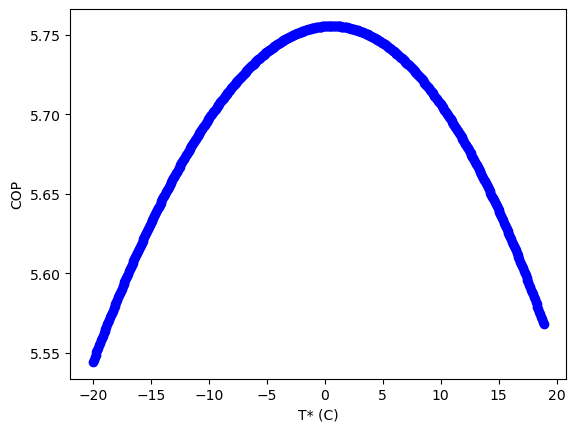

In [112]:
T_high_C = 18.889
T_low_C = -20
T=np.linspace(T_low_C,T_high_C,num=500)

COP_Temp=[]

for i in T:
    COP1= COP_finder(i,T_low_C,T_high_C)
    COP_Temp.append(COP1)

plt.plot(T,COP_Temp,'bo')
plt.xlabel("T* (C)")
plt.ylabel("COP")

max_COP=max(COP_Temp)
max_COP_index=COP_Temp.index(max_COP)

T_max_COP=T[max_COP_index]

print(f'The max COP of {max_COP:.5f} occurs when T={T_max_COP :.5f} C or T={T_max_COP+273.15 :.5f} K ')


#### Another improvement
We also though about using a turbine instead of the expansion valves. It would also change the optimal Tmiddle because state 8 and 4 would change. We were inspired by the Brayton cycle to couple the work out from the turbine to the work in from the compressor to lower the work in. This is beneficial as it should boost our COP by a large amount.

In [113]:
def COP_finder_Turbine(T,T_low,T_high):
    fluid_low = 'CarbonDioxide'
    fluid_high = 'Ammonia'
    
    Tmiddle_K= T+273.15
    
    #state 1
    T1_K=T_low+273.15
    X1=1
    h1 = PropsSI('H','T',T1_K,'Q',X1,fluid_low)
    s1 = PropsSI('S','T',T1_K,'Q',X1,fluid_low)
    P1_Pa = PropsSI('P','T',T1_K,'Q',X1,fluid_low)
    
    #state 2
    s2=s1
    T2_K=Tmiddle_K
    
    h2=PropsSI('H','S',s2,'T',T2_K,fluid_low)
    P2_Pa=PropsSI('P','S',s2,'T',T2_K,fluid_low)
    
    #state 3
    P3_Pa=P2_Pa
    X3=0
    
    h3 = PropsSI('H','P',P3_Pa,'Q',X3,fluid_low)
    s3 = PropsSI('S','P',P3_Pa,'Q',X3,fluid_low)
    T3_K = PropsSI('T','P',P3_Pa,'Q',X3,fluid_low)
    
    #state 4
    P4_Pa=P1_Pa
    s4=s3
    
    h4 = PropsSI('H','S',s4,'P',P4_Pa,fluid_low)
    T4_K = PropsSI('T','S',s4,'P',P4_Pa,fluid_low)
    
    #state 5
    T5_K=T3_K
    X5=1
    
    h5 = PropsSI('H','T',T5_K,'Q',X5,fluid_high)
    s5 = PropsSI('S','T',T5_K,'Q',X5,fluid_high)
    P5_Pa = PropsSI('P','T',T5_K,'Q',X5,fluid_high)
    
    #state 7
    T7_K=18.889+273.15
    X7=0
    h7 = PropsSI('H','T',T7_K,'Q',X7,fluid_high)
    s7 = PropsSI('S','T',T7_K,'Q',X7,fluid_high)
    P7_Pa = PropsSI('P','T',T7_K,'Q',X7,fluid_high)
    
    #state 6
    s6=s5
    P6_Pa=P7_Pa
    h6=PropsSI('H','S',s6,'P',P6_Pa,fluid_high)
    T6_K=PropsSI('T','S',s6,'P',P6_Pa,fluid_high)
    
    #state 8
    P8_Pa=P5_Pa
    s8=s7
    
    h8 = PropsSI('H','S',s8,'P',P8_Pa,fluid_high)
    T8_K = PropsSI('T','S',s8,'P',P8_Pa,fluid_high)

    mdopt_CO2=0.05
    mdot_Ammonia= mdopt_CO2* (h2-h3)/(h5-h8)
    q_low=mdopt_CO2 * (h1-h4)
    q_high=mdot_Ammonia*(h7-h6)
    w_low=mdopt_CO2*((h2-h1)-(h3-h4))
    w_high=mdot_Ammonia*((h6-h5)-(h7-h8))

    

    w_in=w_low+w_high
    COP_Turbine=q_low/w_in
    return COP_Turbine

The max COP of 6.24705 occurs when T=13.19983 C or T=286.34983 K 


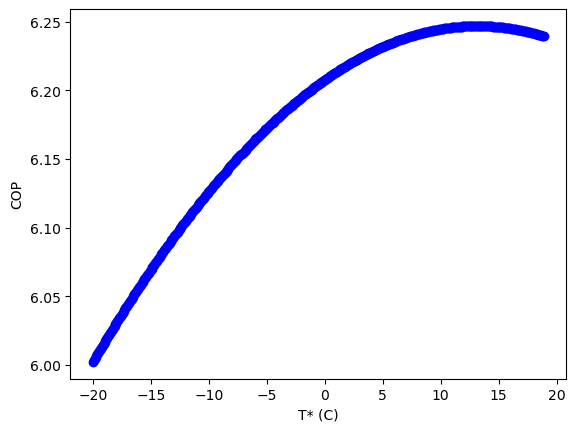

In [118]:
T_high_C = 18.889
T_low_C = -20
T=np.linspace(T_low_C,T_high_C,num=500)

COP_Turbine=[]

for i in T:
    COP2= COP_finder_Turbine(i,T_low_C,T_high_C)
    COP_Turbine.append(COP2)

plt.plot(T,COP_Turbine,'bo')
plt.xlabel("T* (C)")
plt.ylabel("COP")

max_COP_Turbine=max(COP_Turbine)
max_COP_index_Turbine=COP_Turbine.index(max_COP_Turbine)

T_max_COP_Turbine=T[max_COP_index_Turbine]

print(f'The max COP of {max_COP_Turbine:.5f} occurs when T={T_max_COP_Turbine:.5f} C or T={T_max_COP_Turbine+273.15 :.5f} K ')

#### Percent increase in COP

In [115]:
PI_optimal_Temp=100*(max_COP-COP)/COP
PI_Turbine=100*(max_COP_Turbine-COP)/COP

0.002947234373453064
8.540082978077999


In [117]:
print(f' The percent increase in COP when we optomize for temperature is {PI_optimal_Temp:.5f} when we add the turnine the percent increase in COP becomes {PI_Turbine:.5f}')

 The percent increase in COP when we optomize for temperature is 0.00295 when we add the turnine the percent increase in COP becomes 8.54008


----

## Conclusions (150 words max)
To increase the performance we can optimize for temperature. The curve looks quadratic with a peak at T=0.57454C. At either end (where we basically ignore the CO2 cycle or the ammonia cycle) the lowest COP occurs meaning that the cascading refrigeration cycle is optimal to increase COP. This is good because more cooling power can be achieved with the same or lower amount of work. That is beneficial because it means that we can design our system to use the least amount of electrical energy (converting electrical work to compression). 
Then by adding in a turbine that converts some work to offset work, we were able to further increase COP. We then optimized the system when Tmiddle = 13.19983 C. The COP had an 8.5% increase which is a decent margin when optimizing for performance. The next steps would include picking different fluids. 


#### Other fun observations while we were messing with coolprop
Also as a fun sidenote we found that propane in the cascading refrigeration cycle as the working fluid for both cycles has roughly equal COP to R134a [6.496] in both cycles which an increase from the COP of the CO2/ammonia cascading cycle which has a max COP of [6.24705].